In [28]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns
#lfsa_ergan_1_Data = employment
#demo_pjangroup_1_Data = population
#tesem160_1_Data = producitivity
#data path for csv is data (i.e. df = pd.read_csv("data/demo_pjangroup_1_Data.csv"))

In [29]:
#load csv
df_employment = pd.read_csv("data/lfsa_ergan_1_Data.csv")
df_population = pd.read_csv("data/demo_pjangroup_1_Data.csv")
df_productivity = pd.read_csv("data/tesem160_1_Data.csv")

age_15_64 = [
    "From 15 to 19 years",
    "From 20 to 24 years",
    "From 25 to 29 years",
    "From 30 to 34 years",
    "From 35 to 39 years",
    "From 40 to 44 years",
    "From 45 to 49 years",
    "From 50 to 54 years",
    "From 55 to 59 years",
    "From 60 to 64 years"]

age_55_64 = [
    "From 55 to 59 years",
    "From 60 to 64 years"]

country_list=[
    "Belgium",
"Bulgaria",
"Czechia",
"Denmark",
"Germany (until 1990 former territory of the FRG)",
"Estonia",
"Ireland",
"Greece",
"Spain",
"France",
"Croatia",
"Italy",
"Cyprus",
"Latvia",
"Lithuania",
"Luxembourg",
"Hungary",
"Malta",
"Netherlands",
"Austria",
"Poland",
"Portugal",
"Romania",
"Slovenia",
"Slovakia",
"Finland",
"Sweden",
"United Kingdom",
"Iceland",
"Liechtenstein",
"Norway",
"Switzerland",
"Montenegro",
"North Macedonia",
"Albania",
"Serbia",
"Turkey"
]


In [30]:
df_productivity_hour = df_productivity.loc[(df_productivity['NA_ITEM']== 'Nominal labour productivity per hour worked')]
df_productivity_person = df_productivity.loc[(df_productivity['NA_ITEM']== 'Nominal labour productivity per person')]

In [31]:
#find all working age ppl for each country
df_1 = df_population.loc[(df_population['AGE'].isin(age_15_64))& (df_population['SEX']=='Total')]
df_1 = df_1.replace(':','0')
df_1['Value']=df_1['Value'].str.replace(',','')
df_1['Value'] = df_1['Value'].astype(str).astype(int)

df_1 = df_1.groupby(['GEO', 'TIME'])['Value'].sum().reset_index()


In [32]:
df_1.tail()

,GEO,TIME,Value
1195,United Kingdom,2014,41724527
1196,United Kingdom,2015,41875267
1197,United Kingdom,2016,42062632
1198,United Kingdom,2017,42200259
1199,United Kingdom,2018,42309960


In [33]:
#find employment rate fpr age  15-64
df_2 = df_employment.loc[(df_employment['AGE']=='From 15 to 64 years') & (df_employment['SEX']=='Total')]
df_2 = df_2.replace(':','0')
df_2['Value'] = df_2['Value'].astype(str).astype(float)*10
df_2['Value']=df_2['Value'].astype(int)
#df_2 = df_2.groupby(['GEO', 'TIME'])
df_2 = df_2.drop(['SEX','AGE','CITIZEN','UNIT','Flag and Footnotes'], axis=1)
df_2.dtypes

TIME      int64
GEO      object
Value     int64
dtype: object

In [34]:
#multiply employment rate with population to find number of ppl in working force
#total col is final number of ppl in working force

df_15_64 = pd.merge(df_1,df_2, on=['GEO','TIME'])
df_15_64['Total'] = df_15_64['Value_x']*df_15_64['Value_y']/1000

In [35]:
df_15_64.tail()

,GEO,TIME,Value_x,Value_y,Total
755,United Kingdom,2014,41724527,719,2.999993e+07
756,United Kingdom,2015,41875267,727,3.044332e+07
757,United Kingdom,2016,42062632,735,3.091603e+07
758,United Kingdom,2017,42200259,741,3.127039e+07
759,United Kingdom,2018,42309960,747,3.160554e+07


In [36]:
#find total number of ppl for 55-64
df_3 = df_population.loc[(df_population['AGE'].isin(age_55_64))& (df_population['SEX']=='Total')]
df_3 = df_3.replace(':','0')
df_3['Value']=df_3['Value'].str.replace(',','')
df_3['Value'] = df_3['Value'].astype(str).astype(int)

df_3 = df_3.groupby(['GEO', 'TIME'])['Value'].sum().reset_index()

#find total number of ppl for 15-64 that is male
df_m = df_population.loc[(df_population['AGE'].isin(age_15_64))& (df_population['SEX']=='Males')]
df_m = df_m.replace(':','0')
df_m['Value']=df_m['Value'].str.replace(',','')
df_m['Value'] = df_m['Value'].astype(str).astype(int)

df_m = df_m.groupby(['GEO', 'TIME'])['Value'].sum().reset_index()

In [37]:
df_m.tail()

,GEO,TIME,Value
1195,United Kingdom,2014,20780323
1196,United Kingdom,2015,20865610
1197,United Kingdom,2016,20977144
1198,United Kingdom,2017,21057390
1199,United Kingdom,2018,21120207


In [38]:
#find employment rate for 55-64
df_4 = df_employment.loc[(df_employment['AGE']=='From 55 to 64 years') & (df_employment['SEX']=='Total')]
df_4 = df_4.replace(':','0')
df_4['Value'] = df_4['Value'].astype(str).astype(float)*10
df_4['Value']=df_4['Value'].astype(int)
df_4 = df_4.drop(['SEX','AGE','CITIZEN','UNIT','Flag and Footnotes'], axis=1)

#find employment rate for ppl for 15-64 that is male
df_m2 = df_employment.loc[(df_employment['AGE']=='From 15 to 64 years') & (df_employment['SEX']=='Males')]
df_m2 = df_m2.replace(':','0')
df_m2['Value'] = df_m2['Value'].astype(str).astype(float)*10
df_m2['Value']=df_m2['Value'].astype(int)
df_m2 = df_m2.drop(['SEX','AGE','CITIZEN','UNIT','Flag and Footnotes'], axis=1)

In [39]:
df_m2.tail()

,TIME,GEO,Value
81414,2018,Switzerland,845
81519,2018,Montenegro,610
81624,2018,North Macedonia,614
81729,2018,Serbia,657
81834,2018,Turkey,709


In [40]:
#multiply employment rate with population to find number of 55-64 ppl in working force
#total col is final number of ppl in working force

df_55_64 = pd.merge(df_3,df_4, on=['GEO','TIME'])
df_55_64['Total'] = df_55_64['Value_x']*df_55_64['Value_y']/1000

#multiply employment rate with population to find ppl 15-64 male in working force
#to find number of male 15-64 working
df_15_64_m = pd.merge(df_m,df_m2, on=['GEO','TIME'])
df_15_64_m['Total'] = df_15_64_m['Value_x']*df_15_64_m['Value_y']/1000

In [41]:
df_15_64_m.tail()

,GEO,TIME,Value_x,Value_y,Total
755,United Kingdom,2014,20780323,768,1.595929e+07
756,United Kingdom,2015,20865610,776,1.619171e+07
757,United Kingdom,2016,20977144,782,1.640413e+07
758,United Kingdom,2017,21057390,786,1.655111e+07
759,United Kingdom,2018,21120207,791,1.670608e+07


In [42]:
#find percentage of working force that is 55-64
df_55_64_percent = pd.merge(df_55_64,df_15_64, on=['GEO','TIME'])
df_55_64_percent['Percent'] = df_55_64_percent['Total_x']/df_55_64_percent['Total_y']

#find percentage of working force that is male
df_15_64_m_percent = pd.merge(df_15_64_m,df_15_64, on=['GEO','TIME'])
df_15_64_m_percent['Percent'] = df_15_64_m_percent['Total_x']/df_15_64_m_percent['Total_y']


In [43]:
#and 'scale' show difference between said country and EU average
#percent_x is percentage of working force that is 55-64
df_55_64_normal = df_55_64_percent.loc[(df_55_64_percent['GEO']=='European Union - 27 countries (from 2020)')]
df_55_64_normal = pd.merge(df_55_64_percent,df_55_64_normal, on=['TIME'])
df_55_64_normal = df_55_64_normal.dropna()
#df_55_64_normal['Scale'] = df_55_64_normal['Percent_x']-df_55_64_normal['Percent_y']
df_55_64_normal['Scale'] = (df_55_64_normal['Percent_x']-df_55_64_normal['Percent_y'])/df_55_64_normal['Percent_y']
df_55_64_normal = df_55_64_normal.drop(['GEO_y','Value_x_x_y', 'Value_y_x_y' ,'Total_x_y','Value_x_y_y','Value_y_y_y','Total_y_y','Percent_y'], axis=1)
df_55_64_normal = df_55_64_normal.rename(columns={'GEO_x':'GEO'})

#and 'scale' show difference between said country and EU average
#percent_x is percentage of working force that is male
df_15_64_m_normal = df_15_64_m_percent.loc[(df_55_64_percent['GEO']=='European Union - 27 countries (from 2020)')]
df_15_64_m_normal = pd.merge(df_15_64_m_percent,df_15_64_m_normal, on=['TIME'])
df_15_64_m_normal = df_15_64_m_normal.dropna()
#df_15_64_m_normal['Scale'] = df_15_64_m_normal['Percent_x']-df_15_64_m_normal['Percent_y']
df_15_64_m_normal['Scale'] = (df_15_64_m_normal['Percent_x']-df_15_64_m_normal['Percent_y'])/df_15_64_m_normal['Percent_y']
df_15_64_m_normal = df_15_64_m_normal.drop(['GEO_y','Value_x_x_y', 'Value_y_x_y' ,'Total_x_y','Value_x_y_y','Value_y_y_y','Total_y_y','Percent_y'], axis=1)
df_15_64_m_normal = df_15_64_m_normal.rename(columns={'GEO_x':'GEO'})

In [44]:
df_55_64_normal[df_55_64_normal['GEO']=='European Union - 27 countries (from 2020)']
#if scale is negative means male is smaller percentage of work force than EU average (aka  more female ratio)
#if scale is negative means old people is smaller percecntage of work force than EU average (aka younger workforce)

,GEO,TIME,Value_x_x_x,Value_y_x_x,Total_x_x,Value_x_y_x,Value_y_y_x,Total_y_x,Percent_x,Scale
123,European Union - 27 countries (from 2020),2002,46668808,361,1.684744e+07,289547564,612,1.772031e+08,0.095074,0.0
161,European Union - 27 countries (from 2020),2003,47447904,376,1.784041e+07,290500711,614,1.783674e+08,0.100021,0.0
199,European Union - 27 countries (from 2020),2004,48294183,381,1.840008e+07,291648588,615,1.793639e+08,0.102585,0.0
237,European Union - 27 countries (from 2020),2005,49082024,400,1.963281e+07,292588308,622,1.819899e+08,0.107879,0.0
275,European Union - 27 countries (from 2020),2006,49972959,412,2.058886e+07,293273419,632,1.853488e+08,0.111082,0.0
313,European Union - 27 countries (from 2020),2007,50864509,425,2.161742e+07,294047919,643,1.890728e+08,0.114334,0.0
351,European Union - 27 countries (from 2020),2008,52157941,436,2.274086e+07,295005204,648,1.911634e+08,0.118960,0.0
389,European Union - 27 countries (from 2020),2009,53282413,441,2.349754e+07,295377782,636,1.878603e+08,0.125080,0.0
427,European Union - 27 countries (from 2020),2010,54288722,447,2.426706e+07,295024619,633,1.867506e+08,0.129944,0.0
465,European Union - 27 countries (from 2020),2011,55456675,459,2.545461e+07,293881457,634,1.863208e+08,0.136617,0.0


In [45]:
#add the productivity data into the table (for 55-64 table)
df_55_64_productivity_hour = pd.merge(df_55_64_normal,df_productivity_hour, on=['TIME','GEO'])
df_55_64_productivity_hour = df_55_64_productivity_hour.replace(':','0')
df_55_64_productivity_hour['Value'] = df_55_64_productivity_hour['Value'].astype(str).astype(float)
df_55_64_productivity_person = pd.merge(df_55_64_normal,df_productivity_person, on=['TIME','GEO'])
df_55_64_productivity_person = df_55_64_productivity_person.replace(':','0')
df_55_64_productivity_person['Value'] = df_55_64_productivity_person['Value'].astype(str).astype(float)


#add productivity data (for male table)
df_15_64_m_productivity_hour = pd.merge(df_15_64_m_normal,df_productivity_hour, on=['TIME','GEO'])
df_15_64_m_productivity_hour = df_15_64_m_productivity_hour.replace(':','0')
df_15_64_m_productivity_hour['Value'] = df_15_64_m_productivity_hour['Value'].astype(str).astype(float)
df_15_64_m_productivity_person = pd.merge(df_15_64_m_normal,df_productivity_person, on=['TIME','GEO'])
df_15_64_m_productivity_person = df_15_64_m_productivity_person.replace(':','0')
df_15_64_m_productivity_person['Value'] = df_15_64_m_productivity_person['Value'].astype(str).astype(float)

In [46]:
df_15_64_m_productivity_hour[df_15_64_m_productivity_hour['GEO']=='Italy']

,GEO,TIME,Value_x_x_x,Value_y_x_x,Total_x_x,Value_x_y_x,Value_y_y_x,Total_y_x,Percent_x,Scale,UNIT,NA_ITEM,Value,Flag and Footnotes
18,Italy,2005,19145108,699,1.338243e+07,38396908,576,2.211662e+07,0.605085,0.079025,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,108.9,NaN
52,Italy,2006,19114437,704,1.345656e+07,38334879,583,2.234923e+07,0.602104,0.076747,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,107.7,NaN
88,Italy,2007,19095220,706,1.348123e+07,38307428,586,2.244815e+07,0.600549,0.077369,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,107.2,NaN
124,Italy,2008,19198355,701,1.345805e+07,38552645,586,2.259185e+07,0.595704,0.072361,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,108.3,NaN
160,Italy,2009,19259720,685,1.319291e+07,38714573,574,2.222216e+07,0.593682,0.079056,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,108.2,NaN
196,Italy,2010,19262143,675,1.300195e+07,38763626,568,2.201774e+07,0.590521,0.076028,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,106.4,NaN
233,Italy,2011,19273384,673,1.297099e+07,38841198,568,2.206180e+07,0.587939,0.076346,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,105.8,NaN
271,Italy,2012,19210649,663,1.273666e+07,38698168,566,2.190316e+07,0.581499,0.068983,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,105.4,NaN
309,Italy,2013,19218339,647,1.243427e+07,38697060,555,2.147687e+07,0.578961,0.067164,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,104.2,NaN
347,Italy,2014,19566348,647,1.265943e+07,39319593,557,2.190101e+07,0.578029,0.067519,Percentage of EU27 (from 2020) total (based on...,Nominal labour productivity per hour worked,102.7,NaN


In [47]:
#divide up to separate countries for correlationdef
def country_df(country, df):
    df = df.loc[(df['GEO']==country)]
    return df

def all_country_productivity():
    result ={}
    for country in country_list:
        s1 = country+'_person'
        s2 = country+'_hour'
        result[s1] = country_df(country, df_55_64_productivity_person)
        result[s2] = country_df(country, df_55_64_productivity_hour)
    return result
def all_country_productivity2():
    result ={}
    for country in country_list:
        s1 = country+'_person'
        s2 = country+'_hour'
        result[s1] = country_df(country, df_15_64_m_productivity_person)
        result[s2] = country_df(country, df_15_64_m_productivity_hour)
    return result
        
#result2 is for male inworkforce
result = all_country_productivity()
result2= all_country_productivity2()

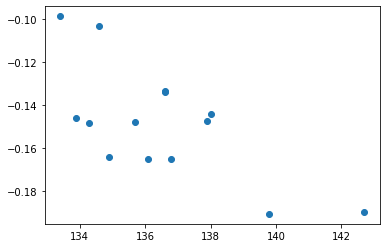

In [48]:
plt.plot( 'Value', 'Scale', data=result['Belgium_hour'], linestyle='none', marker='o')
plt.show()

In [49]:
result

{'Belgium_person':          GEO  TIME  Value_x_x_x  Value_y_x_x   Total_x_x  Value_x_y_x  \
 1    Belgium  2005      1150622          318  365897.796      6851494   
 35   Belgium  2006      1183409          320  378690.880      6906263   
 71   Belgium  2007      1225692          344  421638.048      6976743   
 107  Belgium  2008      1266092          345  436801.740      7046685   
 143  Belgium  2009      1294235          353  456864.955      7101426   
 179  Belgium  2010      1321323          373  492853.479      7147512   
 216  Belgium  2011      1353241          387  523704.267      7250159   
 254  Belgium  2012      1364591          395  539013.445      7270280   
 292  Belgium  2013      1378673          417  574906.641      7286902   
 330  Belgium  2014      1394412          427  595413.924      7286350   
 368  Belgium  2015      1416325          440  623183.000      7295584   
 406  Belgium  2016      1437164          454  652472.456      7326873   
 444  Belgium  2017 

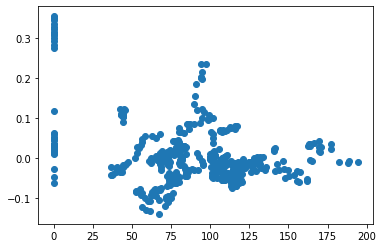

In [50]:
plt.plot( 'Value', 'Scale', data=df_15_64_m_productivity_person, linestyle='none', marker='o')
plt.show()

In [51]:
#set 1 is age, set 2 is gender
correlation_result={}
significant={}
correlation_result2={}
significant2={}
total={}
total2={}

for c in result:
    
    try:
        correlation_result[c], p_val = pearsonr(result[c]['Value'], result[c]['Scale'])
        total[c], p_val = pearsonr(result[c]['Value'], result[c]['Scale'])
        if p_val < 0.05:
            significant[c], p_val = pearsonr(result[c]['Value'], result[c]['Scale'])
            
    except:
        #these do not have data
        #some also do not have gdp data but wont show error since they have employment and population data
        print(c)
for c in result:
    
    try:
        correlation_result2[c], p_val = pearsonr(result2[c]['Value'], result2[c]['Scale'])
        total2[c], p_val = pearsonr(result[c]['Value'], result[c]['Scale'])
        if p_val < 0.05:
            significant2[c], p_val = pearsonr(result2[c]['Value'], result2[c]['Scale'])
            
    except:
        #these do not have data
        #some also do not have gdp data but wont show error since they have employment and population data
        print(c)
        

Liechtenstein_person
Liechtenstein_hour
Albania_person
Albania_hour
Liechtenstein_person
Liechtenstein_hour
Albania_person
Albania_hour


/home/hugo/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [52]:
to_show=[]
c_to_show=[]
for c in significant:
    to_show.append(significant[c])
    c_to_show.append(c)
    print(c + ': '+str(significant[c]))
#positive means older, but more productive
#negative means younger = more producctive
    


Belgium_hour: -0.6954187614590148
Bulgaria_person: -0.5966266930907252
Bulgaria_hour: -0.5901640836170703
Czechia_person: -0.7292874289387812
Denmark_person: -0.8659218119222024
Denmark_hour: -0.8812049044723064
Germany (until 1990 former territory of the FRG)_person: -0.5482559405285592
Estonia_person: -0.842669202999823
Estonia_hour: -0.8068102826765413
Ireland_person: -0.695774239173534
Ireland_hour: -0.7372806107393387
Greece_person: 0.9038953903077336
Greece_hour: 0.9028986409851041
France_hour: -0.5895790225765014
Croatia_hour: -0.6292056009591873
Italy_person: -0.9416294292333658
Italy_hour: -0.9624742316494829
Cyprus_person: 0.9175964987217158
Cyprus_hour: 0.9495524843696156
Latvia_person: -0.7327692153899292
Latvia_hour: -0.6576482080121521
Malta_hour: -0.6107008583244211
Poland_person: 0.951625743298176
Poland_hour: 0.9350615323509114
Romania_person: -0.6341399367196355
Romania_hour: -0.6263448026244923
Slovakia_person: 0.9548814070591993
Slovakia_hour: 0.9658571629576079
Fin

In [53]:
to_show2=[]
c_to_show2=[]
for c in significant2:
    to_show2.append(significant2[c])
    c_to_show2.append(c)
    print(c + str(significant2[c]))
#positive means more male  and more productive
#negative means more female  and more productive

Belgium_hour0.46701540052575535
Bulgaria_person0.8828275915896749
Bulgaria_hour0.8712388518155461
Czechia_person0.2781176922512709
Denmark_person0.7194368595515106
Denmark_hour0.7221196394918716
Germany (until 1990 former territory of the FRG)_person-0.6617817209346838
Estonia_person0.8197272734023816
Estonia_hour0.7585964717163234
Ireland_person-0.12237248653836884
Ireland_hour-0.2536617451227684
Greece_person0.9064197283312299
Greece_hour0.893706161310375
France_hour-0.5659991929937292
Croatia_hour0.10574358860904033
Italy_person0.8657990506036789
Italy_hour0.8254932875525671
Cyprus_person0.7528057139087652
Cyprus_hour0.8084641008321303
Latvia_person0.24101228301828267
Latvia_hour0.32139009445540867
Malta_hour-0.7502913050280396
Poland_person0.9414691213816566
Poland_hour0.9354088469718017
Romania_person0.9352478189820158
Romania_hour0.9296701334569698
Slovakia_person0.8511956386773675
Slovakia_hour0.8334123782068397
Finland_person-0.8253710967903956
Finland_hour-0.781804658037747
Sw

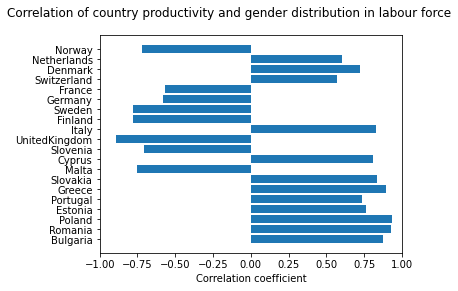

In [54]:
gender_graph_label=[ 'Norway',
'Netherlands',
'Denmark',
'Switzerland',
'France',
'Germany',
'Sweden',
'Finland',
'Italy',
'UnitedKingdom',
'Slovenia',
'Cyprus',
'Malta',
'Slovakia',
'Greece',
'Portugal',
'Estonia',
'Poland',
'Romania',
'Bulgaria']
gender_graph_label_r = list(reversed(gender_graph_label))
gender_graph_val=[-0.71835,
0.60403,
0.72212,
0.571502,
-0.566,
-0.58076,
-0.78106,
-0.7818,
0.825493,
-0.89349,
-0.70819,
0.808464,
-0.75029,
0.833412,
0.893706,
0.734212,
0.758596,
0.935409,
0.92967,
0.871239]
gender_graph_val_r = list(reversed(gender_graph_val))
y_pos = np.arange(len(gender_graph_label_r))
plt.barh(y_pos, gender_graph_val_r)
plt.subplots_adjust(left=0.2)
# Create names on the y-axis
plt.yticks(y_pos, gender_graph_label_r)
plt.xlim(-1,1)
plt.savefig('gender_corr')
plt.suptitle('Correlation of country productivity and gender distribution in labour force')
plt.xlabel('Correlation coefficient')

# Show graphic
plt.show()

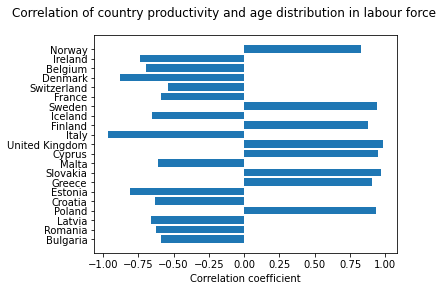

In [55]:
age_graph_label=[ 'Norway',
 'Ireland',
 'Belgium',
 'Denmark',
 'Switzerland',
 'France',
 'Sweden',
 'Iceland',
 'Finland',
 'Italy',
 'United Kingdom',
 'Cyprus',
 'Malta',
 'Slovakia',
 'Greece',
 'Estonia',
 'Croatia',
 'Poland',
 'Latvia',
 'Romania',
 'Bulgaria'
]
age_graph_val=[
0.8265,
-0.7373,
-0.6954,
-0.8812,
-0.5396,
-0.5896,
0.9407,
-0.6548,
0.8802,
-0.9625,
0.9843,
0.9496,
-0.6107,
0.9659,
0.9029,
-0.8068,
-0.6292,
0.9351,
-0.6576,
-0.6263,
-0.5902
]
age_graph_label_r = list(reversed(age_graph_label))
age_graph_val_r = list(reversed(age_graph_val))
y_pos = np.arange(len(age_graph_label_r))
plt.barh(y_pos, age_graph_val_r)
 
# Create names on the y-axis
plt.yticks(y_pos, age_graph_label_r)
plt.subplots_adjust(left=0.2)
plt.savefig('age_corr')
plt.suptitle('Correlation of country productivity and age distribution in labour force')
plt.xlabel('Correlation coefficient')
# Show graphic
plt.show()